In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
resultsFolder = 'results/continuous/tests/'
def get_value(filename, pro = None, acc = None) :
    data = []
    for i in range(1):
        if(pro == None):
            fname = resultsFolder + filename + str(i) + '.csv'
        else: 
            fname = resultsFolder + filename + str(i) + '_' + str(pro) + '_' + str(acc) + '.csv'
        rw = pd.read_csv(fname).iloc[:,1] # read column 1
        data.append(rw)

    merged = pd.concat(data,axis=1)
    means = np.mean(merged, axis=1)

    upper = np.max(merged, axis=1)
    lower = np.min(merged, axis=1)
    # print(upper)
    # print(get_avg(upper))
    return get_avg(means), get_avg(lower), get_avg(upper)

def get_avg(data):

    #get avg last 100 reward 
    num_loop = 150
    rewards = data.tolist()
    avg_reward = [0.] * (len(rewards) - num_loop)
    r_count = 0.
    for i in range(len(rewards)):
        r_count += rewards[i]
        # if(i < 100): 
        #     avg_reward[i] = r_count/(i + 1)
        # else:
        if(i >= num_loop): 
            r_count -= rewards[i-num_loop]
            avg_reward[i - num_loop] = r_count/num_loop
    

    # get avg of cumulative_rewards
    """
    rewards = data.tolist()
    avg_reward = [0.] * len(rewards)
    cumulative_rewards = [0.] * len(rewards)
    cumulated_r = 0.
    for i in range(len(rewards)):
        cumulated_r += rewards[i]
        cumulative_rewards[i] = cumulated_r
    for i in range(len(rewards)):
        avg_reward[i] = cumulative_rewards[i]/ (i+1)
    """
            
    return np.array(avg_reward)
    # return data

In [167]:
def plotRewards(filename, RL, RLlower, RLupper, 
            IRLOptmist, OIRLOptmistlower, OIRLOptmistupper,
            IRLReal, IRLReallower, IRLRealupper,
            IRLPessmistic, IRLPessmisticlower, IRLPessmisticupper):
   
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    plt.figure('Collected reward')
    plt.suptitle('Collected reward')

    plt.plot(RL, label = 'Average reward RL', linestyle = '--', color = 'y' )
    plt.plot(IRLOptmist, label = 'Average reward IRLOp', linestyle = '--', color =  'r')
    plt.plot(IRLReal, label = 'Average reward IRLReal', linestyle = '--', color =  'g')
    plt.plot(IRLPessmistic, label = 'Average reward IRLPes', linestyle = '--', color =  'b')
    # plt.fill_between(np.arange(len(IRL)), IRLlower, IRLupper, color = 'r', alpha=0.1)
    plt.fill_between(np.arange(len(RL)), RLlower, RLupper, color = 'y', alpha=0.1)
    plt.fill_between(np.arange(len(RL)), OIRLOptmistlower, OIRLOptmistupper, color = 'r', alpha=0.1)
    plt.fill_between(np.arange(len(RL)), IRLReallower, IRLRealupper, color = 'g', alpha=0.1)
    plt.fill_between(np.arange(len(RL)), IRLPessmisticlower, IRLPessmisticupper, color = 'b', alpha=0.1)


    plt.legend(loc=4,prop={'size':8}, bbox_to_anchor=(1.5, -0.3),
          fancybox=True, shadow=True, ncol=5)
    plt.xlabel('Episodes')
    plt.ylabel('Avg Reward')

    plt.savefig(resultsFolder + filename + '.png')

    plt.show()

In [168]:
RL, RLlower, RLupper = get_value("rewardsRL")
IRLOptmist, OIRLOptmistlower, OIRLOptmistupper = get_value("rewardsIRL", 1, 1)
IRLReal, IRLReallower, IRLRealupper = get_value("rewardsIRL", 0.47316, 0.9487)
IRLPessmistic, IRLPessmisticlower, IRLPessmisticupper = get_value("rewardsIRL", 0.23658, 0.47435)

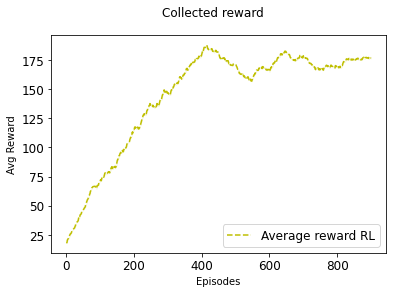

In [169]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.figure('Collected reward')
plt.suptitle('Collected reward')

plt.plot(RL, label = 'Average reward RL', linestyle = '--', color = 'y' )
plt.fill_between(np.arange(len(RL)), RLlower, RLupper, color = 'y', alpha=0.1)

plt.legend(loc=4,prop={'size':12})
plt.xlabel('Episodes')
plt.ylabel('Avg Reward')

plt.show()

ValueError: operands could not be broadcast together with shapes (950,) (650,) 

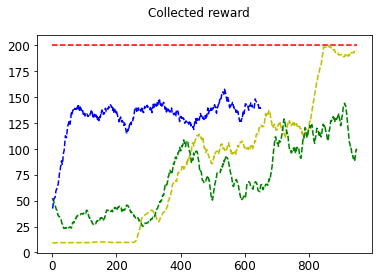

In [145]:
plotRewards("rewards", 
            RL, RLlower, RLupper, 
            IRLOptmist, OIRLOptmistlower, OIRLOptmistupper,
            IRLReal, IRLReallower, IRLRealupper,
            IRLPessmistic, IRLPessmisticlower, IRLPessmisticupper
            )